# Classifying Organic Compounds as musk or non-musk

### Problem Statement: 
Given the dataset about organic chemical compounds we have to classigy these compounds in two classes either musk or non-musk. So this is a binary class classfication problem.

### Dataset: https://drive.google.com/file/d/1pZhzZnaPi74aKCQImSPrzrTxWzVeE0qv/view?usp=sharing

### Columns we have in our dataset:
* ID                : serial number
* Molecule_name     : Out of all the dataset we have only 102 unique molecule names
* Conformation_name : unique name for every chemical compound
* f1-f166           : numerical values
* class             : either 0 or 1

# 1. Reading the data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#import sqlite3
import pandas as pd
import numpy as np
import nltk
#import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as process
from sklearn.model_selection import train_test_split 

from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout

Using TensorFlow backend.


Reading Data after importing all the required modules

In [2]:
# reading the dataset using pandas read_csv

organic_data = pd.read_csv("musk_csv.csv")

In [3]:
# getting the rows and columns present in our dataset

organic_data.shape

(6598, 170)

In [4]:
organic_data.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


Analysing various featuers using pandas to get some knowlede about the features

In [5]:
organic_data['molecule_name'].describe()

count              6598
unique              102
top       NON-MUSK-j146
freq               1044
Name: molecule_name, dtype: object

### Observation:
* Here we can observe that out of total 6598 rows of data.
* We have 102 unique molecule_name
* With NON-MUSK-j146 occuring 1044 times in our data set.

In [6]:
organic_data['conformation_name'].describe()

count         6598
unique        6598
top       j100_2+1
freq             1
Name: conformation_name, dtype: object

### Observation:
* Here all the values are unique.
* We've unique 6598 conformation names.

In [7]:
organic_data['f1'].describe()

count    6598.000000
mean       58.945135
std        53.249007
min       -31.000000
25%        37.000000
50%        44.000000
75%        53.000000
max       292.000000
Name: f1, dtype: float64

In [8]:
organic_data['f2'].describe()

count    6598.000000
mean     -119.128524
std        90.813375
min      -199.000000
25%      -193.000000
50%      -149.000000
75%       -95.000000
max        95.000000
Name: f2, dtype: float64

In [9]:
# checking if any of our datapoint contains null values

organic_data.isnull().any().sum()

0

### Observation:
* Our dataset do not contains any null values.

In [7]:
# finding about various features of data usig pandas
print("Number of data points of class 1 = ", len(organic_data[organic_data['class']== 1]))
print("Number of data points of class 0 = ", len(organic_data[organic_data['class']== 0]))

Number of data points of class 1 =  1017
Number of data points of class 0 =  5581


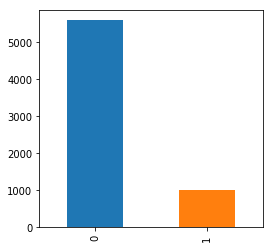

In [6]:
organic_data['class'].value_counts().plot(kind= 'bar', figsize= (4,4))

### Observation:
* We can see that the data in our hand is severely imbalanced.
* Thus we can not feed this imbalanced dataset directly into our model as we might get poor results.

# 2. Splitting data in train and validation

So here we'll split the data and prepare it, so that we can input it in out model.

In [9]:
x = organic_data.drop(['ID', 'molecule_name', 'conformation_name', 'class'], axis=1)
y = organic_data['class'].values

In [90]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 166 entries, f1 to f166
dtypes: int64(166)
memory usage: 8.4 MB


In [10]:
print(x.shape)
print(y.shape)

(6598, 166)
(6598,)


In [11]:
x.head(3)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39


In [12]:
# here we are actually splitting our dataset using train test split into 80:20
# 80% train and 20% test

x_train, x_test , y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [13]:
print(len(x_train))
print(len(x_test))

5278
1320


### Also we need to scale the data before feeding it to the model

There are various sclaer present and we can use any of them accoding to our requirement.
1. MinMaxScaler
2. StandardScaler
3. RobustScaler

In [15]:
# standardising our data using minmax-scaler 
# I used it initially but then later on used Standart scaler as it was giving me better accuracy

scale = process.MinMaxScaler(feature_range=(0,1)) 
x_train = scale.fit_transform(x_train) 
x_test  = scale.transform(x_test)

I have used MinMaxScaler initially but then switched to StandardScaler as it was giving me somewhat better model performance.

In [33]:
# standardising our data using standard-scaler
# I prefered this as this was giving me better results in terms of model accuracy

scale = process.StandardScaler() 
x_train = scale.fit_transform(x_train) 
x_test  = scale.transform(x_test)

In [88]:
type(x_train)

numpy.ndarray

In [35]:
print(x_train)

[[-0.24104901  0.41079633  0.17736132 ... -0.37155292 -0.14879353
  -0.61713841]
 [-0.44988022  0.1131053   1.20777163 ... -0.01050713 -0.17558342
   1.01953064]
 [-0.44988022  0.92899924 -0.66168708 ... -0.064664   -0.09521375
   0.92449825]
 ...
 [-0.2030797  -0.76894221  0.53064486 ... -0.44376207 -0.29613794
  -0.30036375]
 [-0.22206436 -0.85714696 -1.04441091 ... -0.46181436 -0.45687728
  -0.36371868]
 [-0.24104901 -0.86817255 -0.5439259  ... -0.44376207 -0.38990256
  -0.36371868]]


### So as we encountered that our dataset was imbalanced and we can not direclty feed imbalanced dataset into our model, we need to deal with the imbalanced dataset first.

### There are various approaches to deal with imbalanced dataset like resampling, etc.
### And further Resampling is also of two types;
1. Undersampling
2. Oversampling

and because among these two techniques oversampling is prefered over undersampling so we'll use oversampling techniques. 

## 2.1. Using Random Over Sampler
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

In [75]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [76]:
print(len(x_train_resampled))
print(len(x_train_resampled))

8936
8936


## 2.1.1 Model_1 with random over sampling

In [133]:
import warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Dense(64,activation='relu', input_shape=(166,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                10688     
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 33        
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
history = model.fit(x_train_resampled, y_train_resampled, epochs=50, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Train on 8936 samples, validate on 1320 samples
Epoch 1/50
8936/8936 [==============================] - 1s 68us/step - loss: 0.3618 - acc: 0.8362 - val_loss: 0.1692 - val_acc: 0.9417
Epoch 2/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.1498 - acc: 0.9476 - val_loss: 0.0971 - val_acc: 0.9697
Epoch 3/50
8936/8936 [==============================] - 0s 18us/step - loss: 0.0880 - acc: 0.9735 - val_loss: 0.0553 - val_acc: 0.9811
Epoch 4/50
8936/8936 [==============================] - 0s 16us/step - loss: 0.0576 - acc: 0.9858 - val_loss: 0.0552 - val_acc: 0.9773
Epoch 5/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.0391 - acc: 0.9905 - val_loss: 0.0308 - val_acc: 0.9902
Epoch 6/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.0283 - acc: 0.9936 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 7/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.0207 - acc: 0.9956 - val_loss: 0.0249 - val_acc: 0.9932
Epoch 8

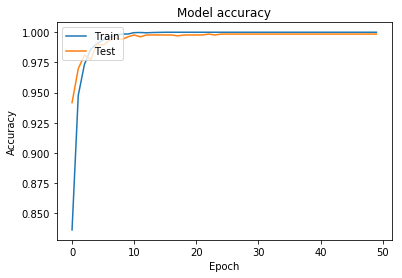

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



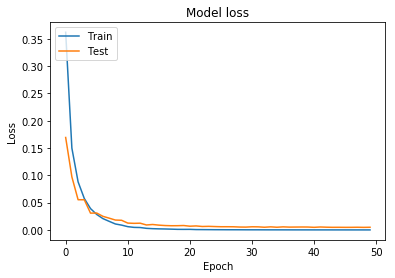

In [80]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [91]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Accuracy : %.2f%%" % (score[1]*100))

Accuracy : 99.85%


We can save our keras deep learning models and use it later by loading the model directly. There are two approaches;
https://machinelearningmastery.com/save-load-keras-deep-learning-models/
1. Save model to JSON
2. Save model to YAML


In [137]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# later... we can load the model here direcly if required
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

## 2.2 SMOTE Overasmpling 

In [92]:
from imblearn.over_sampling import SMOTE
x_train_smote, y_train_smote = SMOTE().fit_resample(x_train, y_train)

In [93]:
print(len(x_train_smote))
print(len(x_train_smote))

8936
8936


## 2.2.1 Model_1 using SMOTE oversampling

In [94]:
import warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Dense(64,activation='relu', input_shape=(166,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                10688     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
history = model.fit(x_train_smote, y_train_smote, epochs=50, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Train on 8936 samples, validate on 1320 samples
Epoch 1/50
8936/8936 [==============================] - 1s 71us/step - loss: 0.3669 - acc: 0.8395 - val_loss: 0.1754 - val_acc: 0.9348
Epoch 2/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.1515 - acc: 0.9459 - val_loss: 0.1058 - val_acc: 0.9636
Epoch 3/50
8936/8936 [==============================] - 0s 18us/step - loss: 0.0900 - acc: 0.9701 - val_loss: 0.0745 - val_acc: 0.9712
Epoch 4/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.0598 - acc: 0.9830 - val_loss: 0.0481 - val_acc: 0.9765
Epoch 5/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.0395 - acc: 0.9907 - val_loss: 0.0458 - val_acc: 0.9818
Epoch 6/50
8936/8936 [==============================] - 0s 18us/step - loss: 0.0284 - acc: 0.9940 - val_loss: 0.0334 - val_acc: 0.9856
Epoch 7/50
8936/8936 [==============================] - 0s 17us/step - loss: 0.0210 - acc: 0.9959 - val_loss: 0.0315 - val_acc: 0.9879
Epoch 8

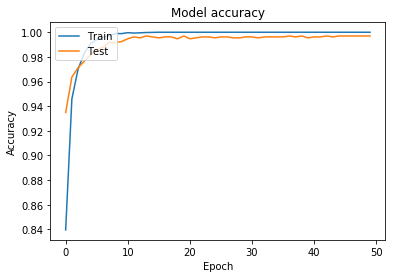

In [96]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



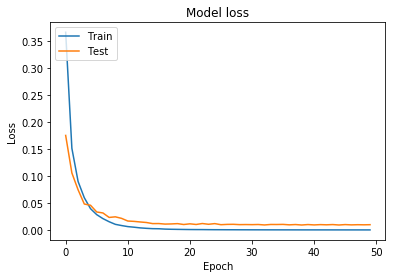

In [97]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [98]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Accuracy : %.2f%%" % (score[1]*100))

Accuracy : 99.70%


## 3. Model_2 with random oversampling

In [125]:

model_2 = Sequential()
model_2.add(Dense(128,activation='relu', input_shape=(166,)))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               21376     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 42,049
Trainable params: 42,049
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
history = model_2.fit(x_train_resampled, y_train_resampled, epochs=50, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Train on 8936 samples, validate on 1320 samples
Epoch 1/50
8936/8936 [==============================] - 1s 115us/step - loss: 0.3524 - acc: 0.8333 - val_loss: 0.1234 - val_acc: 0.9515
Epoch 2/50
8936/8936 [==============================] - 0s 28us/step - loss: 0.1286 - acc: 0.9476 - val_loss: 0.0538 - val_acc: 0.9720
Epoch 3/50
8936/8936 [==============================] - 0s 28us/step - loss: 0.0792 - acc: 0.9725 - val_loss: 0.0397 - val_acc: 0.9841
Epoch 4/50
8936/8936 [==============================] - 0s 28us/step - loss: 0.0447 - acc: 0.9848 - val_loss: 0.0621 - val_acc: 0.9735
Epoch 5/50
8936/8936 [==============================] - 0s 27us/step - loss: 0.0293 - acc: 0.9904 - val_loss: 0.0276 - val_acc: 0.9917
Epoch 6/50
8936/8936 [==============================] - 0s 27us/step - loss: 0.0231 - acc: 0.9919 - val_loss: 0.0181 - val_acc: 0.9932
Epoch 7/50
8936/8936 [==============================] - 0s 28us/step - loss: 0.0163 - acc: 0.9944 - val_loss: 0.0136 - val_acc: 0.9939
Epoch 

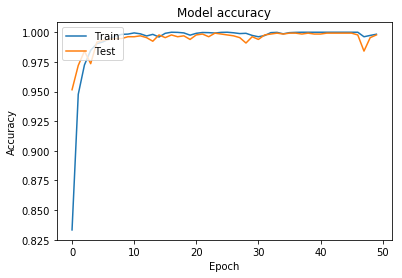

In [127]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



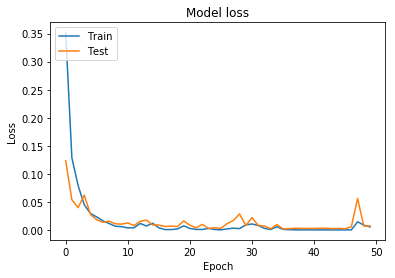

In [128]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [130]:
score = model_2.evaluate(x_test,y_test,verbose=0)
print("Accuracy : %.2f%%" % (score[1]*100))

Accuracy : 99.77%


## 4. Conclusions: 

1. Starting with the problem, this is a binary class classfication problem.
2. We are provided with a dataset of organic chemical compounds which belongs to a class either musk or non-musk.
3. We initially had 170 features and we saw which to use and which not to use like conformation_name, ID, class, these features were droped.
4. The column of class is used as class label, if 1 then musk and if 0 then non-musk.
5. Then we started reading our data and try to analyse it using pandas.
6. We observed that out dataset is imbalanced.
7. So we used two oversampling techniques to deal with the imbalanced dataset.
8. Also to scale the data before feeding it to the model we tried StandardSclaer and MinMaxSclaer.
9. But at last we used StandardScaler as it was giving better accuracy for our model.
10. Then we made sequential model with different oversampling techniques.
11. We made models with random over sampler and smote oversampling.
12. Also I observed that our model with random oversampling was getting better model accuracy.
13. Then we used to plots to visualize the model performance, we used model acuracy plot and model loss plot.
14. I have made two different models architectures, model_1(with random over sampler and SMOTE) and model_2(with random over sampler).
